## 0) Importando arquivos

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


## 1) Lendo o arquivo

### Fonte Kaggle:https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [54]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/hora', 'ActivePower(KW)', 'WindSpeed(m/s)', 'CurvaTeórica(KWh)', 'DirecaoVento(°)']
del turbina['DirecaoVento(°)']
display(turbina)

,Data/hora,ActivePower(KW),WindSpeed(m/s),CurvaTeórica(KWh)
0,01 01 2018 00:00,380.047791,5.311336,416.328908
1,01 01 2018 00:10,453.769196,5.672167,519.917511
2,01 01 2018 00:20,306.376587,5.216037,390.900016
3,01 01 2018 00:30,419.645905,5.659674,516.127569
4,01 01 2018 00:40,380.650696,5.577941,491.702972
...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503


## 2) Plotando os dados em um gráfico - Real

<Axes: xlabel='WindSpeed(m/s)', ylabel='ActivePower(KW)'>

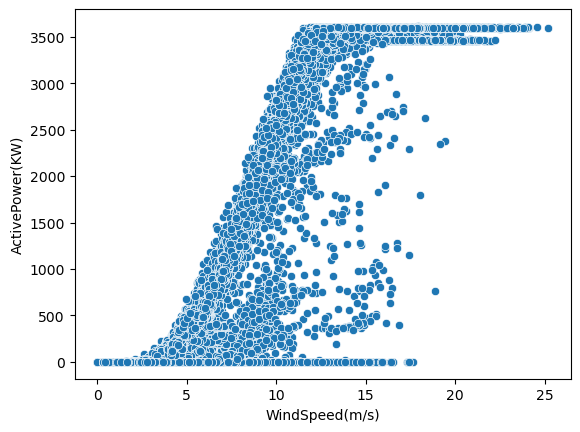

In [18]:
sns.scatterplot(data=turbina, x ='WindSpeed(m/s)', y='ActivePower(KW)')

 ## 3) Plotando os dados em um grafico - Teórica

<Axes: xlabel='WindSpeed(m/s)', ylabel='CurvaTeórica(KWh)'>

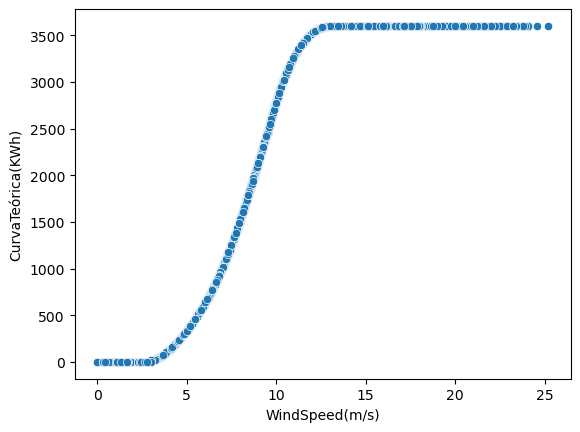

In [19]:
sns.scatterplot(data=turbina, x ='WindSpeed(m/s)', y='CurvaTeórica(KWh)')

## 4) Criando "limites aceitáveis"

In [30]:
pot_real = turbina['ActivePower(KW)'].tolist()
pot_teorica = turbina['CurvaTeórica(KWh)'].tolist()
pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
        
print(dentro_limite.count('Dentro')/len(dentro_limite)) 


0.37286760340391845


## 5) Adicionando lista "dentro_limite" ao dataframe:

In [32]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/hora,ActivePower(KW),WindSpeed(m/s),CurvaTeórica(KWh),DentroLimite
0,01 01 2018 00:00,380.047791,5.311336,416.328908,Fora
1,01 01 2018 00:10,453.769196,5.672167,519.917511,Fora
2,01 01 2018 00:20,306.376587,5.216037,390.900016,Fora
3,01 01 2018 00:30,419.645905,5.659674,516.127569,Fora
4,01 01 2018 00:40,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,Fora
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,Fora
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,Fora
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,Dentro


## 6) Plotando novamente o gráfico:

<Axes: xlabel='WindSpeed(m/s)', ylabel='ActivePower(KW)'>

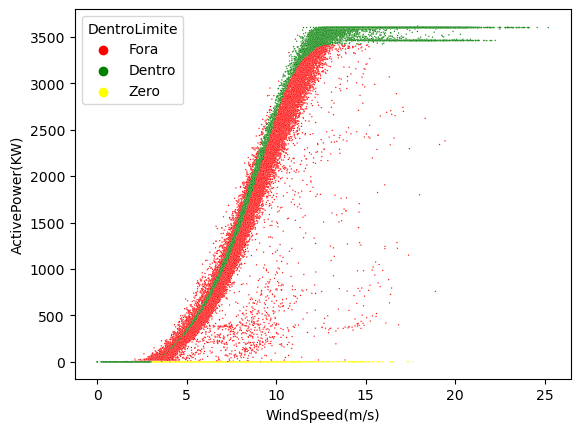

In [45]:
cores = {'Dentro':'green', 'Fora':'red', 'Zero':'yellow'}
sns.scatterplot(data=turbina, x ='WindSpeed(m/s)', y='ActivePower(KW)', hue = 'DentroLimite', s=1, palette=cores)